In [1]:
import pandas as pd
from datetime import datetime
import time
import numpy as np
import re
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
df_train = pd.read_csv('./data/bikesharing_train.csv',parse_dates=["datetime"],encoding = 'utf-8')
df_train.shape

(10886, 12)

In [3]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# df_train.columns
# df_train.info()

In [5]:
df_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
# 모든 feature값의 상관계수 알기 : 별... 상관 없다.... 
df_train.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('tab20c'), axis=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.0,0.029,-0.0081,0.0089,0.26,0.26,0.19,-0.15,0.097,0.16,0.16
holiday,0.029,1.0,-0.25,-0.0071,0.00029,-0.0052,0.0019,0.0084,0.044,-0.021,-0.0054
workingday,-0.0081,-0.25,1.0,0.034,0.03,0.025,-0.011,0.013,-0.32,0.12,0.012
weather,0.0089,-0.0071,0.034,1.0,-0.055,-0.055,0.41,0.0073,-0.14,-0.11,-0.13
temp,0.26,0.00029,0.03,-0.055,1.0,0.98,-0.065,-0.018,0.47,0.32,0.39
atemp,0.26,-0.0052,0.025,-0.055,0.98,1.0,-0.044,-0.057,0.46,0.31,0.39
humidity,0.19,0.0019,-0.011,0.41,-0.065,-0.044,1.0,-0.32,-0.35,-0.27,-0.32
windspeed,-0.15,0.0084,0.013,0.0073,-0.018,-0.057,-0.32,1.0,0.092,0.091,0.1
casual,0.097,0.044,-0.32,-0.14,0.47,0.46,-0.35,0.092,1.0,0.5,0.69
registered,0.16,-0.021,0.12,-0.11,0.32,0.31,-0.27,0.091,0.5,1.0,0.97


## datetime 피쳐값을 년,월,시간으로 뽀개기

In [7]:
# 듀란듀란! 날짜 뽀개기
df_train["year"] = df_train["datetime"].dt.year
df_train["month"] = df_train["datetime"].dt.month
df_train["day"] = df_train["datetime"].dt.day
df_train["hour"] = df_train["datetime"].dt.hour
df_train["minute"] = df_train["datetime"].dt.minute
df_train["second"] = df_train["datetime"].dt.second
df_train.shape

(10886, 18)

In [8]:
# df_train.head(20)

## 피쳐값 조정을 위해 모든 변수 *시.각.화* 하자구욧!!!

C:\Users\dotst\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5, 0, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

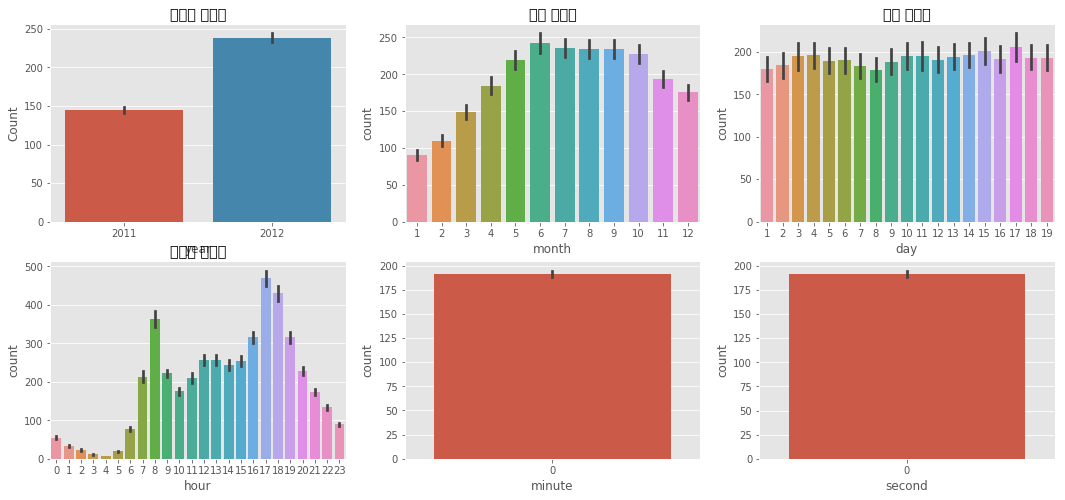

In [9]:
import seaborn as sns
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=df_train, x="year", y="count", ax=ax1)
sns.barplot(data=df_train, x="month", y="count", ax=ax2)
sns.barplot(data=df_train, x="day", y="count", ax=ax3)
sns.barplot(data=df_train, x="hour", y="count", ax=ax4)
sns.barplot(data=df_train, x="minute", y="count", ax=ax5)
sns.barplot(data=df_train, x="second", y="count", ax=ax6)

ax1.set(ylabel='Count',title="연도별 대여량")
ax2.set(xlabel='month',title="월별 대여량")
ax3.set(xlabel='day', title="일별 대여량")
ax4.set(xlabel='hour', title="시간별 대여량")

In [10]:
# df_train.columns

In [11]:
# df_train.info()

In [12]:
# df_train['windspeed'].value_counts()

In [13]:
# df_train['season'].value_counts()

In [14]:
# df_train['holiday'].value_counts()

In [15]:
# df
# _train['workingday'].value_counts()

In [16]:
# df_train['weather'].value_counts()

In [17]:
# df_train['temp'].value_counts()

In [18]:
# df_train['atemp'].value_counts()

In [19]:
# df_train['humidity'].value_counts()

In [20]:
# df_train['casual'].value_counts()

In [21]:
# df_train['registered'].value_counts()

In [22]:
# tmp_wind = df_train.loc[['windspeed' == 0], 'windspeed']

## 자! 이제 풍속 0인거 조지자규 듀란

In [23]:
# 풍속이 0인것과 아닌 것의 세트를 나누어 준다듀란
trainWind0 = df_train.loc[df_train['windspeed'] == 0]
trainWindNot0 = df_train.loc[df_train['windspeed'] != 0]

In [24]:
trainWind0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0,2,0,2,2011,1,1,6,0,0
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0,1,2,3,2011,1,1,7,0,0
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0,1,7,8,2011,1,1,8,0,0
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0,8,6,14,2011,1,1,9,0,0
64,2011-01-03 19:00:00,1,0,1,1,8.20,12.880,47,0.0,8,102,110,2011,1,3,19,0,0


In [25]:
del trainWind0['windspeed']

In [26]:
trainWind0.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'casual', 'registered', 'count', 'year', 'month',
       'day', 'hour', 'minute', 'second'],
      dtype='object')

In [27]:
wind=np.random.normal(trainWindNot0['windspeed'].mean(), 1, 1313)
df_wind=pd.DataFrame(wind)
df_wind=df_wind.rename(columns={0:'windspeed'})
df_wind.head()
df_wind

,windspeed
0,12.830170
1,14.344631
2,15.691235
3,14.925844
4,12.133768
5,13.492459
6,14.094877
7,17.194302
8,13.705848
9,13.608036


In [28]:
# df_train['count'].value_counts()

In [29]:
# del df_train['atemp']

In [30]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [31]:
trainWind0 = trainWind0.reset_index(drop=True)
trainWind0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,1,1,2011,1,1,4,0,0
5,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,2,0,2,2011,1,1,6,0,0
6,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,1,2,3,2011,1,1,7,0,0
7,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,1,7,8,2011,1,1,8,0,0
8,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,8,6,14,2011,1,1,9,0,0
9,2011-01-03 19:00:00,1,0,1,1,8.20,12.880,47,8,102,110,2011,1,3,19,0,0


In [32]:
# for i in len(df_train):
#     if df_train['windspeed'][i] == 0:
#         df_train['windspeedd'][i]

In [33]:
test = pd.concat([trainWind0,df_wind],axis = 1)
test
# del test['windspeed']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,casual,registered,count,year,month,day,hour,minute,second,windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,3,13,16,2011,1,1,0,0,0,12.830170
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,8,32,40,2011,1,1,1,0,0,14.344631
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,5,27,32,2011,1,1,2,0,0,15.691235
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,3,10,13,2011,1,1,3,0,0,14.925844
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,1,1,2011,1,1,4,0,0,12.133768
5,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,2,0,2,2011,1,1,6,0,0,13.492459
6,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,1,2,3,2011,1,1,7,0,0,14.094877
7,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,1,7,8,2011,1,1,8,0,0,17.194302
8,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,8,6,14,2011,1,1,9,0,0,13.705848
9,2011-01-03 19:00:00,1,0,1,1,8.20,12.880,47,8,102,110,2011,1,3,19,0,0,13.608036


In [34]:
test.columns
test[['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'year', 'month',
       'day', 'hour', 'minute', 'second']]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,12.830170,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,14.344631,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,15.691235,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,14.925844,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,12.133768,0,1,1,2011,1,1,4,0,0
5,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,13.492459,2,0,2,2011,1,1,6,0,0
6,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,14.094877,1,2,3,2011,1,1,7,0,0
7,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,17.194302,1,7,8,2011,1,1,8,0,0
8,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,13.705848,8,6,14,2011,1,1,9,0,0
9,2011-01-03 19:00:00,1,0,1,1,8.20,12.880,47,13.608036,8,102,110,2011,1,3,19,0,0


In [35]:
trainWindNot0.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [36]:
test2 = pd.concat([test, trainWindNot0], axis=0)

C:\Users\dotst\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [37]:
test2

,atemp,casual,count,datetime,day,holiday,hour,humidity,minute,month,registered,season,second,temp,weather,windspeed,workingday,year
0,14.395,3,16,2011-01-01 00:00:00,1,0,0,81,0,1,13,1,0,9.84,1,12.830170,0,2011
1,13.635,8,40,2011-01-01 01:00:00,1,0,1,80,0,1,32,1,0,9.02,1,14.344631,0,2011
2,13.635,5,32,2011-01-01 02:00:00,1,0,2,80,0,1,27,1,0,9.02,1,15.691235,0,2011
3,14.395,3,13,2011-01-01 03:00:00,1,0,3,75,0,1,10,1,0,9.84,1,14.925844,0,2011
4,14.395,0,1,2011-01-01 04:00:00,1,0,4,75,0,1,1,1,0,9.84,1,12.133768,0,2011
5,13.635,2,2,2011-01-01 06:00:00,1,0,6,80,0,1,0,1,0,9.02,1,13.492459,0,2011
6,12.880,1,3,2011-01-01 07:00:00,1,0,7,86,0,1,2,1,0,8.20,1,14.094877,0,2011
7,14.395,1,8,2011-01-01 08:00:00,1,0,8,75,0,1,7,1,0,9.84,1,17.194302,0,2011
8,17.425,8,14,2011-01-01 09:00:00,1,0,9,76,0,1,6,1,0,13.12,1,13.705848,0,2011
9,12.880,8,110,2011-01-03 19:00:00,3,0,19,47,0,1,102,1,0,8.20,1,13.608036,1,2011


In [38]:
test2=test2[['season', 'holiday', 'workingday', 'weather', 'temp',
        'humidity', 'windspeed', 'year', 'month',
       'day', 'hour','count']]
test2

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,hour,count
0,1,0,0,1,9.84,81,12.830170,2011,1,1,0,16
1,1,0,0,1,9.02,80,14.344631,2011,1,1,1,40
2,1,0,0,1,9.02,80,15.691235,2011,1,1,2,32
3,1,0,0,1,9.84,75,14.925844,2011,1,1,3,13
4,1,0,0,1,9.84,75,12.133768,2011,1,1,4,1
5,1,0,0,1,9.02,80,13.492459,2011,1,1,6,2
6,1,0,0,1,8.20,86,14.094877,2011,1,1,7,3
7,1,0,0,1,9.84,75,17.194302,2011,1,1,8,8
8,1,0,0,1,13.12,76,13.705848,2011,1,1,9,14
9,1,0,1,1,8.20,47,13.608036,2011,1,3,19,110


In [115]:
# test2['temp'] =test2['temp'] / test2['temp'].max()
# test2['temp']

# test2['humidity'] =test2['humidity'] / test2['humidity'].max()
# test2['humidity']

test2['windspeed'] =test2['windspeed'] / test2['windspeed'].max()
test2['windspeed']

test2.head(10)
# X = X / X.max()
# X = X - X.mean(axis=1).reshape(len(X), 1)

C:\Users\dotst\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,hour,count
0,1,0,0,1,0.24,0.81,0.225103,0,1,1,0,16
1,1,0,0,1,0.22,0.80,0.251674,0,1,1,1,40
2,1,0,0,1,0.22,0.80,0.275300,0,1,1,2,32
3,1,0,0,1,0.24,0.75,0.261871,0,1,1,3,13
4,1,0,0,1,0.24,0.75,0.212885,0,1,1,4,1
5,1,0,0,1,0.22,0.80,0.236723,2011,1,1,6,2
6,1,0,0,1,0.20,0.86,0.247292,2011,1,1,7,3
7,1,0,0,1,0.24,0.75,0.301671,2011,1,1,8,8
8,1,0,0,1,0.32,0.76,0.240467,2011,1,1,9,14
9,1,0,1,1,0.20,0.47,0.238750,2011,1,3,19,110


In [135]:
# for i in range(len(test2['year'])):
#     if test2['year'][i] == 2011:
#         test2['year'][i] = 0
#     else:
#         test2['year'][i] = 1
# test2['year'][0]
# test2['year'].value_counts()

# test2['year'].value_counts()
test3=test2.drop(columns =['year'])
#  df.drop(columns=['B', 'C'])
test3.to_csv('./data/test3_bike.csv',encoding = 'utf-8')

In [40]:
# test2.to_csv('./data/test2_bike.csv', sep=',', encoding='utf-8')

In [ ]:
# x_data = test2[['season', 'holiday', 'workingday', 'weather', 'temp',
#         'humidity', 'windspeed', 'year', 'month',
#        'day', 'hour']]
# y_data = test2[['count']]

In [41]:
test2.describe()

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,hour,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,61.886460,14.557925,2011.501929,6.521495,9.992559,11.541613,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,19.245033,6.656548,0.500019,3.444373,5.476608,6.915838,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.000000,6.003200,2011.000000,1.000000,1.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,47.000000,8.998100,2011.000000,4.000000,5.000000,6.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,62.000000,13.847328,2012.000000,7.000000,10.000000,12.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,77.000000,16.997900,2012.000000,10.000000,15.000000,18.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,100.000000,56.996900,2012.000000,12.000000,19.000000,23.000000,977.000000


In [42]:
# test2['year'].unique()

# for i in range(len(test2)):
#     if str(test2['year'][i]) == '2011':
#         test2['year'][i] = '0'
#     else:
#         test2['year'][i] = '1'

In [43]:
test2['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [51]:
type(test2['windspeed'][0])

numpy.float64

In [45]:
from tqdm import tqdm_notebook
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

In [46]:
# def xavier_init(n_inputs, n_outputs, uniform=True):
#     if uniform:
#         # 6 was used in the paper.
#         init_range = tf.sqrt(6.0 / (n_inputs + n_outputs))
#         return tf.random_uniform_initializer(-init_range, init_range)
#     else:
#         # 3 gives us approximately the same limints as above since this repicks
#         # values greater than 2 standard deviations from the mean.
#         stddev = tf.sqrt(3.0 / (n_inputs + n_outputs))
#         return tf.truncated_normal_initializer(stddev=stddev)

In [183]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

# np.loadtxt('./data/test2_bike.csv', delimiter=',', dtype=np.float32)
xy = np.loadtxt('./data/test3_bike.csv', delimiter=',', skiprows=1, dtype=np.int32)
x_data = xy[:, 1:-1]
y_data = xy[:, [-1]]

# Make sure the shape and data are OK
print("x_data.shape : {}, \tlen(x_data) : {} \nx_data : \n{}".format(x_data.shape, len(x_data), x_data))
print("-"*25)
print("y_data.shape : {}  \ny_data : \n{}".format(y_data.shape, y_data))

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 10])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([10, 128]), name='weight')
b1 = tf.Variable(tf.random_normal([128]), name='bias')
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# W2 = tf.Variable(tf.random_normal([128, 128]), name='weight2')
# b2 = tf.Variable(tf.random_normal([128]), name='bias2')
# L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W2 = tf.Variable(tf.random_normal([128, 1]))
b2 = tf.Variable(tf.random_normal([1]))

# Hypothesis
hypothesis = tf.matmul(L1, W2) + b2

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

x_data.shape : (10886, 10), 	len(x_data) : 10886 
x_data : 
[[ 1  0  0 ...  1  1  0]
 [ 1  0  0 ...  1  1  1]
 [ 1  0  0 ...  1  1  2]
 ...
 [ 4  0  1 ... 12 19 21]
 [ 4  0  1 ... 12 19 22]
 [ 4  0  1 ... 12 19 23]]
-------------------------
y_data.shape : (10886, 1)  
y_data : 
[[ 16]
 [ 40]
 [ 32]
 ...
 [168]
 [129]
 [ 88]]


In [166]:
optimizer, cost, hypothesis
# train

(<tensorflow.python.training.gradient_descent.GradientDescentOptimizer at 0x28f7c0f1f98>,
 <tf.Tensor 'Mean_22:0' shape=() dtype=float32>,
 <tf.Tensor 'add_22:0' shape=(?, 1) dtype=float32>)

In [167]:
from tqdm import tqdm_notebook

In [ ]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(100001)):
    cost_val, hy_val, t_val = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})

    if step % 1000 == 0 or step < 10 : 
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, t_val))
        print("Step : {} \tCost : {} ".format(step, cost_val))
        


Step : 0 
Cost : 133091.40625 
Prediction :
None
Step : 0 	Cost : 133091.40625 

Step : 1 
Cost : 29334.10546875 
Prediction :
None
Step : 1 	Cost : 29334.10546875 

Step : 2 
Cost : 27413.626953125 
Prediction :
None
Step : 2 	Cost : 27413.626953125 

Step : 3 
Cost : 27280.85546875 
Prediction :
None
Step : 3 	Cost : 27280.85546875 

Step : 4 
Cost : 27180.37890625 
Prediction :
None
Step : 4 	Cost : 27180.37890625 

Step : 5 
Cost : 27089.96875 
Prediction :
None
Step : 5 	Cost : 27089.96875 

Step : 6 
Cost : 27008.015625 
Prediction :
None
Step : 6 	Cost : 27008.015625 

Step : 7 
Cost : 26933.115234375 
Prediction :
None
Step : 7 	Cost : 26933.115234375 

Step : 8 
Cost : 26864.203125 
Prediction :
None
Step : 8 	Cost : 26864.203125 

Step : 9 
Cost : 26800.330078125 
Prediction :
None
Step : 9 	Cost : 26800.330078125 

Step : 1000 
Cost : 23368.294921875 
Prediction :
None
Step : 1000 	Cost : 23368.294921875 

Step : 2000 
Cost : 22907.138671875 
Prediction :
None
Step : 2000 	

In [176]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(100001)):
    cost_val, hy_val, t_val = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})

    if step % 1000 == 0 or step < 10 : 
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, t_val))
        print("Step : {} \tCost : {} ".format(step, cost_val))
        


Step : 0 
Cost : 71804.8125 
Prediction :
None
Step : 0 	Cost : 71804.8125 

Step : 1 
Cost : 66386.296875 
Prediction :
None
Step : 1 	Cost : 66386.296875 

Step : 2 
Cost : 61638.48046875 
Prediction :
None
Step : 2 	Cost : 61638.48046875 

Step : 3 
Cost : 57478.12109375 
Prediction :
None
Step : 3 	Cost : 57478.12109375 

Step : 4 
Cost : 53832.2421875 
Prediction :
None
Step : 4 	Cost : 53832.2421875 

Step : 5 
Cost : 50637.015625 
Prediction :
None
Step : 5 	Cost : 50637.015625 

Step : 6 
Cost : 47836.34765625 
Prediction :
None
Step : 6 	Cost : 47836.34765625 

Step : 7 
Cost : 45381.31640625 
Prediction :
None
Step : 7 	Cost : 45381.31640625 

Step : 8 
Cost : 43228.95703125 
Prediction :
None
Step : 8 	Cost : 43228.95703125 

Step : 9 
Cost : 41341.765625 
Prediction :
None
Step : 9 	Cost : 41341.765625 

Step : 1000 
Cost : 26591.97265625 
Prediction :
None
Step : 1000 	Cost : 26591.97265625 

Step : 2000 
Cost : 26526.26953125 
Prediction :
None
Step : 2000 	Cost : 26526.

None
Step : 80000 	Cost : 26098.69921875 

Step : 81000 
Cost : 26097.931640625 
Prediction :
None
Step : 81000 	Cost : 26097.931640625 

Step : 82000 
Cost : 26097.1640625 
Prediction :
None
Step : 82000 	Cost : 26097.1640625 

Step : 83000 
Cost : 26096.4296875 
Prediction :
None
Step : 83000 	Cost : 26096.4296875 

Step : 84000 
Cost : 26095.708984375 
Prediction :
None
Step : 84000 	Cost : 26095.708984375 

Step : 85000 
Cost : 26094.986328125 
Prediction :
None
Step : 85000 	Cost : 26094.986328125 

Step : 86000 
Cost : 26094.28125 
Prediction :
None
Step : 86000 	Cost : 26094.28125 

Step : 87000 
Cost : 26093.57421875 
Prediction :
None
Step : 87000 	Cost : 26093.57421875 

Step : 88000 
Cost : 26092.892578125 
Prediction :
None
Step : 88000 	Cost : 26092.892578125 

Step : 89000 
Cost : 26092.205078125 
Prediction :
None
Step : 89000 	Cost : 26092.205078125 

Step : 90000 
Cost : 26091.564453125 
Prediction :
None
Step : 90000 	Cost : 26091.564453125 

Step : 91000 
Cost : 2609

In [67]:
test2.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'year', 'month', 'day', 'hour', 'count'],
      dtype='object')